<a href="https://colab.research.google.com/github/acho110/Projects-Resume/blob/main/Predictive_Model_Eval_British_Bank_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, confusion_matrix,accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# Reset Plot Settings
plt.rcdefaults()

training_df = pd.read_csv('training_data.csv',index_col=0)
testing_df = pd.read_csv('testing_data.csv',index_col=0)

## **About the data:**

Recall that our data reflects information on customers of a British bank, who were provided with information and received an offer on a "Personal Equity Plan" (PEP). Our data contains records of the customers who received the initial offer, and whether each customer responded positively to the offer. Based on this past experience, the managers are interested in using predictive modeling to predict other customers interest (or lack thereof) in the product towards designing a carefully targeted campaign. The columns in the data set are as follows:

1. **age: Age of customer in years (numeric)**

2. **income: Income of customer (numeric)**

3. **married: Is the customer married (TRUE/FALSE)**

4. **children: Number of children (numeric)**

5. **car: Does the customer own a car (TRUE/FALSE)**

6. **save_act: Does the customer have a savings account (TRUE/FALSE)**

7. **current_act: Does the customer have a current account (TRUE/FALSE)**

8. **mortgage: Does the customer have a mortgage (TRUE/FALSE)**

9. **pep: Did the customer sign up for a PEP (Personal Equity Plan) after the last mailing (TRUE/FALSE)**

10. **sex_FEMALE: Is the customer female? If 0, the customer is assumed to be male (0/1)**

11. **region_INNER_CITY: Is the customer located in the inner city (0/1)**

12. **region_RURAL: Is the customer located in a rural area (0/1)**

13. **region_SUBURBAN: Is the customer located in the suburbs (0/1)**

14. **region_TOWN: Is the customer located in a town (0/1)**

Each row corresponds to a customer and contains the customer’s attributes above.

`training_df` is data that will be used to train the three models.

`testing_df` is the testing data that will be used in the last part of the homework. This data represents a set of new customers from which to find "hot prospects" for the next targeting campaign using the predictive model built from the training set.

The first 5 rows of both dataframes are shown below

In [ ]:
training_df

,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,48.0,17546.00,False,1.0,False,False,False,False,True,1,1,0,0,0
1,40.0,30085.10,True,3.0,True,False,True,True,False,0,0,0,0,1
2,51.0,16575.40,True,0.0,True,True,True,False,False,1,1,0,0,0
3,23.0,20375.40,True,3.0,False,False,True,False,False,1,0,0,0,1
4,57.0,50576.30,True,0.0,False,True,False,False,False,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61.0,47025.00,False,2.0,True,True,True,True,False,1,1,0,0,0
596,30.0,9672.25,True,0.0,True,True,True,False,False,1,1,0,0,0
597,31.0,15976.30,True,0.0,True,True,False,False,True,1,0,0,0,1
598,29.0,14711.80,True,0.0,False,True,False,True,False,0,1,0,0,0


##**Should the bank prioritize a decision tree, logistic regression, or bagging model for the marketing campaign?**

In [ ]:
# drop the column we are interested in
X_train = training_df.drop(columns = ['pep'])
y_train = training_df['pep']

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 6, random_state = 0).fit(X_train,y_train)
logistic_regression_model = LogisticRegression(random_state = 0).fit(X_train,y_train)
bagging_model = BaggingClassifier(random_state = 0).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#we want a 10 fold cross validation, so we can denote it as cv = 10, which will be equal
    #to a variable called cv in the def
mycv = 10

# need a function, can use report score like in the instapoll

def report_score(model, X, y, cv):

    #Want accuracy and ROC, AUC
    acc = cross_val_score(model, X, y, cv = mycv, scoring = "accuracy")
    meanAcc = np.mean(acc)

    #Find ROC AUC
    rocScores = cross_val_score(model, X, y, cv = mycv, scoring = "roc_auc")
    meanRocScores = np.mean(rocScores)

    #return the values
    return meanAcc, meanRocScores


#need the score for trees, log reg and bagging
    #accuracy and roc auc for all 3, gives us 6 total scores
        #will call the function report_score and define each variable before it


treeAccuracy, treeAucRoc = report_score(decision_tree_model, X_train, y_train, mycv)
#show the scores

print("Decision Tree Scores: ")
print(f"The mean accuracy for the decision tree is {treeAccuracy:.2f} and the Mean Roc Auc for the tree is {treeAucRoc:.2f}")
print()



#now can do the same thing for the logisitc regression
LogAcc, LRRocAuc = report_score(logistic_regression_model, X_train, y_train, mycv)
print("Logistic Regression Scores: ")
print(f"The mean accuracy for the logistic regression is {LogAcc:.2f} and the Mean Roc Auc for the logistic regression is {LRRocAuc:.2f}")
print()


#Lastly for the bagging
BagAcc, BagRocAuc = report_score(bagging_model, X_train, y_train, mycv)
print("Bagging Scores: ")
print(f"The mean accuracy for the bagging model is {BagAcc:.2f} and the Mean Roc Auc for the model is {BagRocAuc:.2f}")
print()

Decision Tree Scores: 
The mean accuracy for the decision tree is 0.86 and the Mean Roc Auc for the tree is 0.88



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Scores: 
The mean accuracy for the logistic regression is 0.62 and the Mean Roc Auc for the logistic regression is 0.66

Bagging Scores: 
The mean accuracy for the bagging model is 0.87 and the Mean Roc Auc for the model is 0.91



##**The code below creates dataframes for each model of the actual classification and its corresponding prediction probability.**

In [ ]:
prob_df = pd.DataFrame()

prob_df['Actual Class'] = training_df.pep
dt_prob_df = prob_df.iloc[:]
lg_prob_df = prob_df.iloc[:]
bg_prob_df = prob_df.iloc[:]

dt_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(decision_tree_model, X_train, y_train, cv=10, method='predict_proba')]
lg_prob_df['prob'] = [round(pred[1],4) for pred in  cross_val_predict(logistic_regression_model, X_train, y_train, cv=10, method='predict_proba')]
bg_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(bagging_model, X_train, y_train, cv=10, method='predict_proba')]

dt_prob_df = dt_prob_df.sort_values("prob", ascending = False)
lg_prob_df = lg_prob_df.sort_values("prob", ascending = False)
bg_prob_df = bg_prob_df.sort_values("prob", ascending = False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

##**Produce a lift chart, where the y-coordinates for the data points are true postitives (customers who actually said 'Yes' to the offer), and the x-axis corresponds to the proportion of customers targeted.**

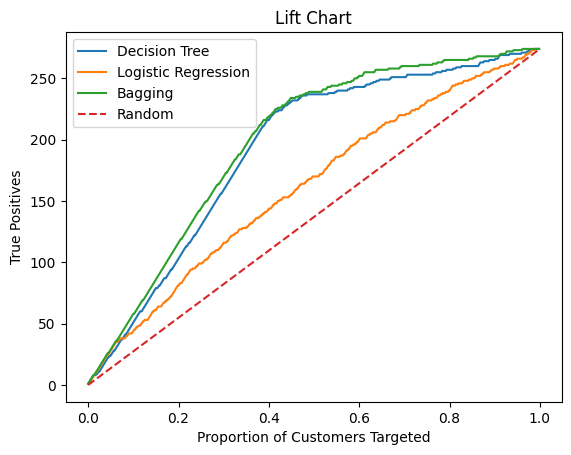

In [ ]:
#Example code to get scatter points for the decision tree model:
#given
dt_true_count = 0
dt_y_val = []
for row in dt_prob_df.iterrows():
    #found this piece, same way of calling [1][0] to my knowledge
    if row[1]['Actual Class'] == 1:
        dt_true_count += 1
        #append to the empty list dt y val
    dt_y_val.append(dt_true_count)

# Complete code for the logistic regression and bagging models:
    # we can follow the code from above to do the same thing for the LR and the Bagging models

lg_true_count = 0
lg_y_val = []
for row in lg_prob_df.iterrows():
    if row[1]['Actual Class'] == 1:
        lg_true_count += 1
    lg_y_val.append(lg_true_count)


# bagging model now

bag_true_count = 0
b_y_val = []
for row in bg_prob_df.iterrows():
    if row[1]['Actual Class'] == 1:
        bag_true_count += 1
    b_y_val.append(bag_true_count)



# now we need x values after we made the y values

x_vals = [n/600 for n in range (0,600)]


# use matplotlib to plot the stuff
plt.plot(x_vals, dt_y_val, label="Decision Tree")
plt.plot(x_vals, lg_y_val, label="Logistic Regression")
plt.plot(x_vals, b_y_val, label="Bagging")

# create the random line, found some help from stackoverflow for lift chart
random_line = [n * max(dt_true_count, lg_true_count, bag_true_count) / len(dt_prob_df) for n in range(len(dt_prob_df))]
plt.plot(x_vals, random_line, label="Random", linestyle='--')

plt.title("Lift Chart")
plt.xlabel("Proportion of Customers Targeted")
plt.ylabel("True Positives")
plt.legend()
plt.show()



# Example of one model. Add other models:
#lol
#plt.plot(x_vals, dt_y_val, label="Decision Tree")

# To produce the random line, find out the proportion P of customers whose response to the campaign was "Yes" (i.e at 50% of the sample, we would expect to identify)
# 50% of the "Yes" customers.

##**Which model yields a higher maximum profitability and should therefore be utilized in the marketing campaign?**

* For every customer who is targeted in the campaign and signs up for the PEP, the bank recieves a benefit of 100 dollars.
* Conversely, for every customer who is targeted in the campaign but does not choose to sign up for the PEP, the bank loses 70 dollars.

Optimal Profit for Decision Tree: $20410
Optimal Profit for Logistic Regression: $8830
Optimal Profit for Bagging: $20880


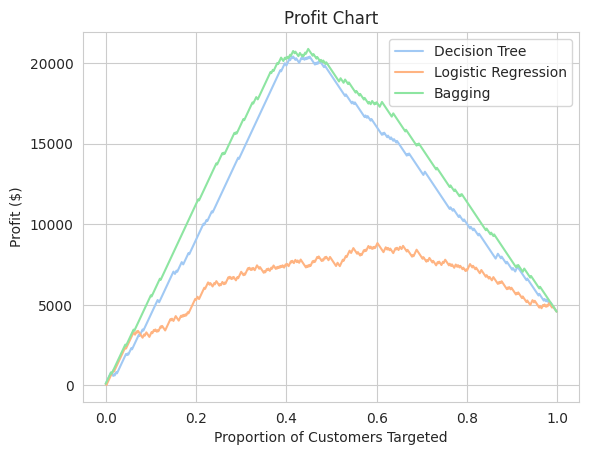

In [ ]:
dt_profit = 0
dt_y_val = []
for row in dt_prob_df.iterrows():
    previous_value = 0
    if row[1]['Actual Class'] == 1:
        dt_profit +=100
    else:
        dt_profit -=70
    dt_y_val.append(dt_profit)

dt_optimal_profit = max(dt_y_val)
print(f"Optimal Profit for Decision Tree: ${dt_optimal_profit}")

lg_profit = 0
lg_y_val = []
for row in lg_prob_df.iterrows():
    if row[1]['Actual Class'] == 1:
        lg_profit +=100
    else:
        lg_profit -=70
    lg_y_val.append(lg_profit)

lg_optimal_profit = max(lg_y_val)
print(f"Optimal Profit for Logistic Regression: ${lg_optimal_profit}")

bag_profit = 0
b_y_val = []
for row in bg_prob_df.iterrows():
    if row[1]['Actual Class'] == 1:
        bag_profit += 100
    else:
        bag_profit -= 70
    b_y_val.append(bag_profit)

bag_optimal_profit = max(b_y_val)
print(f"Optimal Profit for Bagging: ${bag_optimal_profit}")

x_vals = [n / 600 for n in range(0, 600)]

plt.plot(x_vals, dt_y_val, label="Decision Tree")
plt.plot(x_vals, lg_y_val, label="Logistic Regression")
plt.plot(x_vals, b_y_val, label="Bagging")

plt.xlabel("Proportion of Customers Targeted")
plt.ylabel("Profit ($)")
plt.legend()
plt.title("Profit Chart")

plt.show()


##**Based on the profit-lift chart produced, what is the probability threshold (probability of 'Yes') above which customers should be targeted to achieve the maximum profit in the marketing campaign for each model?**

In [ ]:
def get_probabilities(model, X, y):
    probabilities = model.predict_proba(X)[:, 1]

    sample_probabilities = {}


    for i, prob in enumerate(probabilities, start=0):
        sample_probabilities[i] = round(prob,2)

    sorted_probabilities = dict(sorted(sample_probabilities.items(), key=lambda item: item[1], reverse=True))

    return sorted_probabilities

def get_True_Value(model, prob_df):
    true = {}
    for i, row in prob_df.iterrows():

        if row['Actual Class'] == 1:
            true[i] = 'True'
        else:
            true[i] = 'False'
    return true


thresholds = np.linspace(0.0, 1.0, num=101)


def Profit_test(threshold, sorted_dict, true_dict):
    true_positive = 0
    false_positive = 0

    dict_with_selected_values = {}

    # finding the probabilities that match the probability set by the threshold
    for key, val in sorted_dict.items():
        if val >= threshold:
            dict_with_selected_values[key] = val


    # find matching keys of the new dictionary with the threshold values and the dictionary that contains the true or false values
    matching_keys = []
    for key in true_dict.keys():
        if key in dict_with_selected_values:
            matching_keys.append(key)

    # going through the matches and determining if true_positive or false_positive
    for match in matching_keys:
        if true_dict[match] == 'True':
            true_positive +=1
        else:
            false_positive += 1
    profit = (true_positive * 100) - (false_positive * 70)

    ## debug## print('threshold:', threshold, 'profit:', profit, 'True: ', true_positive, 'False: ',false_positive )

    return profit

def max_profit_tresh(sorted_dict, true_dict):
    profit_dict = {}
    thresholds = np.linspace(0.0, 1.0, num=101)
    for i in thresholds:
            profit = Profit_test(i, sorted_dict, true_dict)
            profit_dict[i] = profit

    best_tresh = round(max(profit_dict, key=profit_dict.get),2)
    return best_tresh * 100


## Decision Tree

dt_sorted_dict = get_probabilities(decision_tree_model, X_train, y_train)
dt_true_dict = get_True_Value(decision_tree_model, dt_prob_df)
dt_max_profit_tresh = max_profit_tresh(dt_sorted_dict, dt_true_dict)
print('For the Decision Tree Model the Probability Treshold that maximizes income is',dt_max_profit_tresh,'%')


## Logistical Regression

logistic_regression_model
lg_sorted_dict = get_probabilities(logistic_regression_model, X_train, y_train)
lg_true_dict = get_True_Value(logistic_regression_model, lg_prob_df)
lg_max_profit_tresh = max_profit_tresh(lg_sorted_dict, lg_true_dict)
print('For the Logistical Regression Model the Probability Treshold that maximizes income is',lg_max_profit_tresh,'%')


## Bagging

bg_sorted_dict = get_probabilities(bagging_model, X_train, y_train)
bg_true_dict = get_True_Value(bagging_model, bg_prob_df)
bg_max_profit_tresh = max_profit_tresh(bg_sorted_dict, bg_true_dict)

print('For the Bagging Model the Probability Treshold that maximizes income is',bg_max_profit_tresh,'%')





For the Decision Tree Model the Probability Treshold that maximizes income is 41.0 %
For the Logistical Regression Model the Probability Treshold that maximizes income is 40.0 %
For the Bagging Model the Probability Treshold that maximizes income is 41.0 %


##Identify the customers in the testing data who should be targeted in the profit-optimized marketing campaign.

In [ ]:
# feature of interest is still 'pep', so i assume we will drop that one
X_test = testing_df.drop(columns = ['pep'])
y_test = testing_df['pep']

In [ ]:
## Using the code from part III
## print(bg_sorted_dict)


def tresh_match(sorted_dict, threshold):

    dict_with_selected_values = {}

    for key, val in sorted_dict.items():
        if val >= threshold:
            dict_with_selected_values[key] = val

    return dict_with_selected_values


def print_probabilities(select_dict, tresh):
    print('There are ', len(select_dict), ' customers that fit in the ', tresh*100, '%  probability treshold')
    print()
    for key, value in select_dict.items():
        print(f"Customer {key} has a probability of {value}")


bg_select_dict = tresh_match(bg_sorted_dict, 0.41) # the treshold is 0.41 (41%)

bg_print = print_probabilities(bg_select_dict, 0.41 )





There are  272  customers that fit in the  41.0 %  probability treshold

Customer 5 has a probability of 1.0
Customer 13 has a probability of 1.0
Customer 20 has a probability of 1.0
Customer 27 has a probability of 1.0
Customer 29 has a probability of 1.0
Customer 32 has a probability of 1.0
Customer 34 has a probability of 1.0
Customer 37 has a probability of 1.0
Customer 42 has a probability of 1.0
Customer 48 has a probability of 1.0
Customer 52 has a probability of 1.0
Customer 56 has a probability of 1.0
Customer 59 has a probability of 1.0
Customer 60 has a probability of 1.0
Customer 61 has a probability of 1.0
Customer 71 has a probability of 1.0
Customer 74 has a probability of 1.0
Customer 75 has a probability of 1.0
Customer 77 has a probability of 1.0
Customer 79 has a probability of 1.0
Customer 83 has a probability of 1.0
Customer 84 has a probability of 1.0
Customer 85 has a probability of 1.0
Customer 89 has a probability of 1.0
Customer 90 has a probability of 1.0
Cus

In [ ]:
#Create Pie chart to visualize

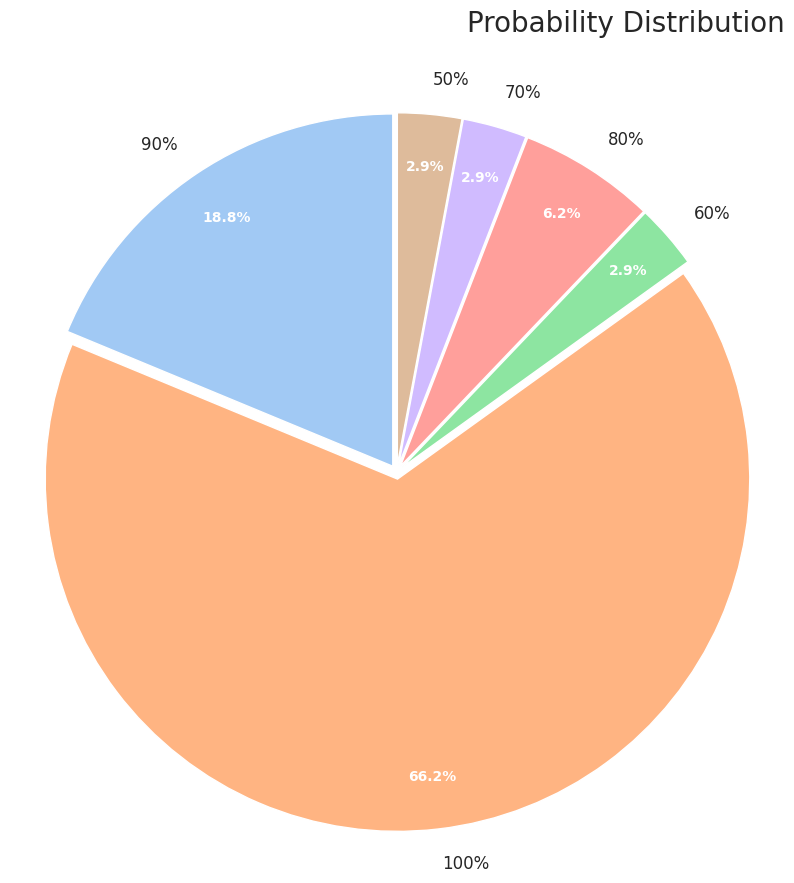

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

probabilities = list(bg_select_dict.values())
unique_probabilities = list(set(probabilities))
probability_counts = [probabilities.count(prob) for prob in unique_probabilities]

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("pastel")

wedges, texts, autotexts = plt.pie(
    probability_counts,
    labels=[f'{int(round(prob * 100))}%' for prob in unique_probabilities],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12},
    pctdistance=0.85,
    labeldistance=1.1,
    explode=[0.02] * len(unique_probabilities))

# Improve label visibility
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.title('Probability Distribution', fontsize=20, loc = 'right', pad = 40)
plt.axis('equal')
plt.show()